# 1. Data Preprocessing

In [1]:
# Import Library
import numpy as np  #numPy library for numerical and array operation
import pandas as pd #pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #matplotlib library for data visualization
from sklearn.preprocessing import StandardScaler #the StandardScaler class from scikit-learn's preprocessing module
from sklearn import metrics #the metrics module from scikit-learn for evaluating machine learning models
import warnings  #the warnings module to handle warnings during code execution
import seaborn as sns #the seaborn library for data visualization
from numpy import set_printoptions
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
%matplotlib inline

### 1.1 Load Dataset

In [2]:
# Loading the dataset
data = pd.read_csv('emergency cases in RCHSP 2023.csv')
# Print the first 5 rows of the dataframe.
data.head()

,ROWNUM,Hospital,Eligibility Class,Gender,Arrival Time,Severity Level,Deparment,Main Diagnosis,Discharge Time,Waiting Time (Minutes),Length of Stay (Minutes)
0,1,Royal Commission Health Services Program,ROYAL COMMISSION,Female,12/13/2023 13:17:48,Level Ⅳ,Emergency Medicine,"Pain, unspecified",12/13/2023 16:43:00,14.0,205
1,2,Royal Commission Health Services Program,ROYAL COMMISSION,Female,12/08/2023 10:59:28,Level Ⅲ,Emergency Medicine,Low back pain,12/08/2023 12:50:00,7.0,111
2,3,Royal Commission Health Services Program,ROYAL COMMISSION,Female,11/05/2023 14:03:02,Level Ⅲ,Emergency Medicine,"Acute upper respiratory infection, unspecified",11/05/2023 14:54:00,24.0,51
3,4,Royal Commission Health Services Program,ROYAL COMMISSION,Female,10/07/2023 22:57:41,Level Ⅲ,Emergency Medicine,Epistaxis,10/08/2023 00:09:00,NaN,71
4,5,Royal Commission Health Services Program,ROYAL COMMISSION,Female,10/21/2023 21:32:17,Level Ⅳ,Emergency Medicine,"Acute upper respiratory infection, unspecified",10/21/2023 23:10:00,56.0,98


In [3]:
data.shape

(97096, 11)

### 1.2 Observing the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97096 entries, 0 to 97095
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ROWNUM                    97096 non-null  object 
 1   Hospital                  97096 non-null  object 
 2   Eligibility Class         97055 non-null  object 
 3   Gender                    97096 non-null  object 
 4   Arrival Time              97096 non-null  object 
 5   Severity Level            95130 non-null  object 
 6   Deparment                 97096 non-null  object 
 7   Main Diagnosis            93826 non-null  object 
 8   Discharge Time            97087 non-null  object 
 9   Waiting Time (Minutes)    92419 non-null  float64
 10  Length of Stay (Minutes)  97087 non-null  object 
dtypes: float64(1), object(10)
memory usage: 8.1+ MB


In [5]:
# Display the "Make" coloumn to understand the content
print(data["Main Diagnosis"].unique()) #Get the unique values in the "Make" column 

['Pain, unspecified' 'Low back pain'
 'Acute upper respiratory infection, unspecified' ...
 'Feeding problem of newborn, unspecified' 'Haemangioma, unspecified site'
 'Neonatal erythema toxicum']


In [6]:
data['Main Diagnosis'].nunique()

1784

In [7]:
# calculate and store the count of missing (NaN) values in each column of the DataFrame 'data' 
data.isnull().sum()

ROWNUM                         0
Hospital                       0
Eligibility Class             41
Gender                         0
Arrival Time                   0
Severity Level              1966
Deparment                      0
Main Diagnosis              3270
Discharge Time                 9
Waiting Time (Minutes)      4677
Length of Stay (Minutes)       9
dtype: int64

In [8]:
# Apply a formatting fuction to the summary statistics to round value to 5 d.p
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Waiting Time (Minutes)
count,92419.00000
mean,31.78995
std,22.85905
min,0.00000
25%,15.00000
50%,26.00000
75%,42.00000
max,417.00000


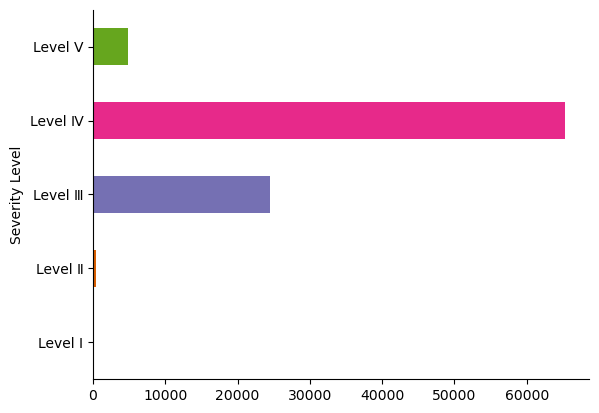

In [31]:
# Severity Level
data.groupby('Severity Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
# Add new column "Treatment Time(Minutes)" to the DataFrame. If it <= 0, people leave before treatment.
data['Length of Stay (Minutes)'] = pd.to_numeric(data['Length of Stay (Minutes)'], errors='coerce')
data['Treatment Time(Minutes)'] = data['Length of Stay (Minutes)']-data['Waiting Time (Minutes)']

In [57]:
# Count the outliers
# Waiting Time (Minutes)
Q1_wait = data['Waiting Time (Minutes)'].quantile(0.25)
Q3_wait = data['Waiting Time (Minutes)'].quantile(0.75)
IQR_wait = Q3_wait - Q1_wait

lower_bound_wait = Q1_wait - 1.5 * IQR_wait
upper_bound_wait = Q3_wait + 1.5 * IQR_wait

outliers_wait = data[(data['Waiting Time (Minutes)'] < lower_bound_wait) | (data['Waiting Time (Minutes)'] > upper_bound_wait)]

num_outliers_wait = outliers_wait.shape[0]

print(f"Number of outliers of the Waiting Time: {num_outliers_wait}")

# Length of Stay (Minutes)
Q1_stay = data['Length of Stay (Minutes)'].quantile(0.25)
Q3_stay = data['Length of Stay (Minutes)'].quantile(0.75)
IQR_stay = Q3_stay - Q1_stay

lower_bound_stay = Q1_stay - 1.5 * IQR_stay
upper_bound_stay = Q3_stay + 1.5 * IQR_stay

outliers_stay = data[(data['Length of Stay (Minutes)'] < lower_bound_stay) | (data['Length of Stay (Minutes)'] > upper_bound_stay)]

num_outliers_stay = outliers_stay.shape[0]

print(f"Number of outliers of the Stay Time: {num_outliers_stay}")
print(f"Explain: Emergency room data may contain many outliers, especially some extreme cases of patient treatment time.\nTherefore, the number of outliers is normal in some cases. The conditions of emergency room patients vary greatly.\nSome patients may need very short treatment time, while others may need long-term hospitalization or monitoring.")

Number of outliers of the Waiting Time: 3172
Number of outliers of the Stay Time: 8751
Explain: Emergency room data may contain many outliers, especially some extreme cases of patient treatment time.
Therefore, the number of outliers is normal in some cases. The conditions of emergency room patients vary greatly.
Some patients may need very short treatment time, while others may need long-term hospitalization or monitoring.


In [40]:
from scipy.stats import mstats

# Winsorize, Set the outliers to the value of the 5th and 95th percentiles
# data['Winsorized Length of Stay'] = mstats.winsorize(data['Length of Stay (Minutes)'], limits=[0.05, 0.05])

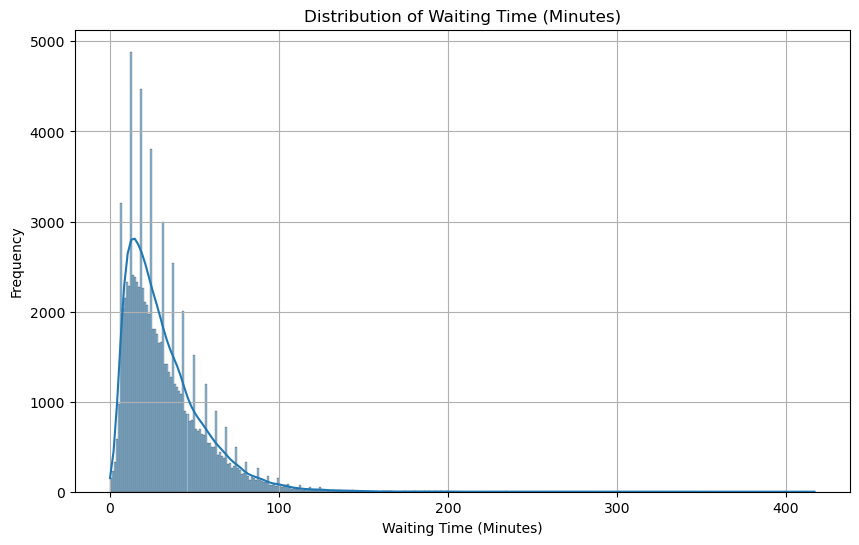

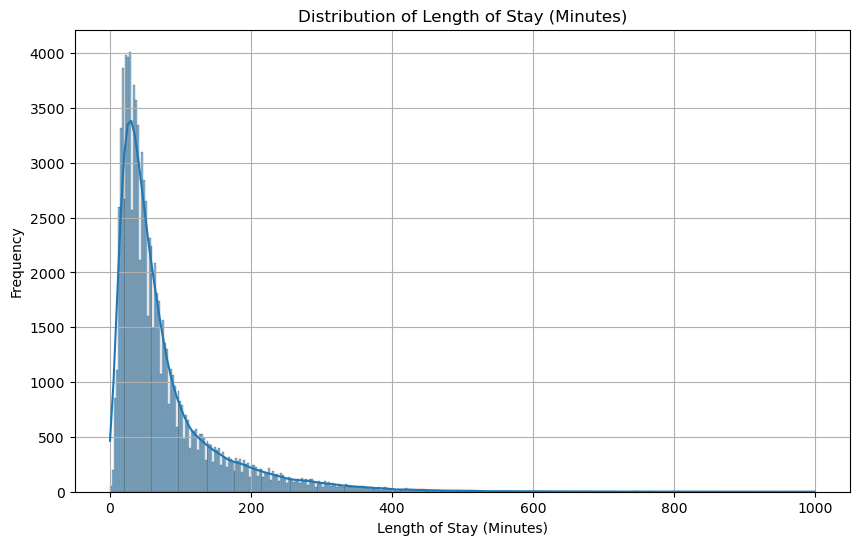

In [35]:
# Plot histograms for the numeric columns to understand their distribution
def plot_distribution(data, column_name):
    plt.figure(figsize=(10,6))
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotting distributions for 'Waiting Time (Minutes)' and 'Length of Stay (Minutes)'
plot_distribution(data, 'Waiting Time (Minutes)')
plot_distribution(data, 'Length of Stay (Minutes)')

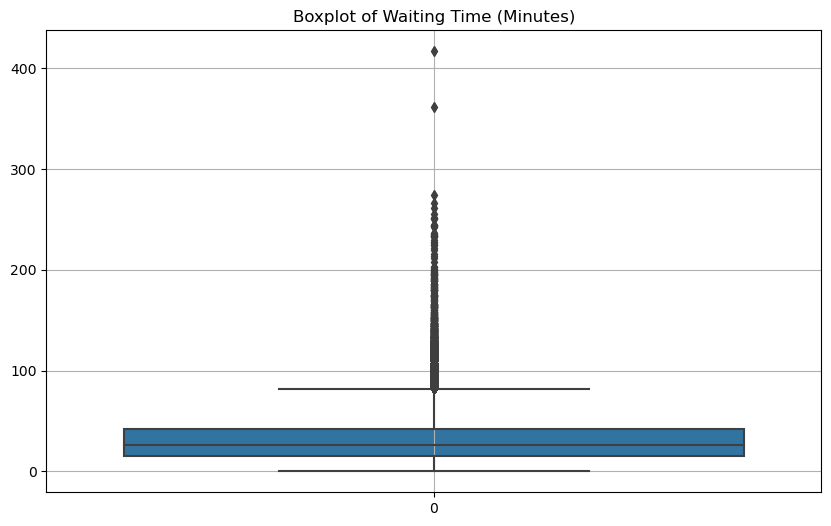

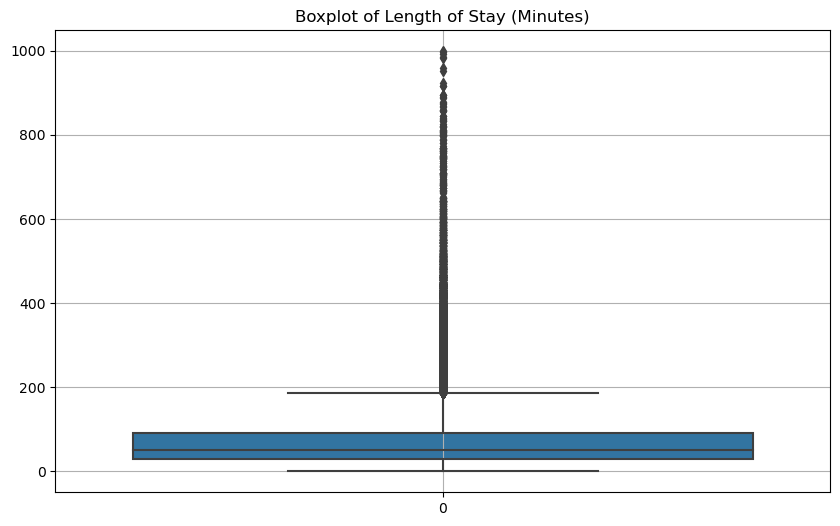

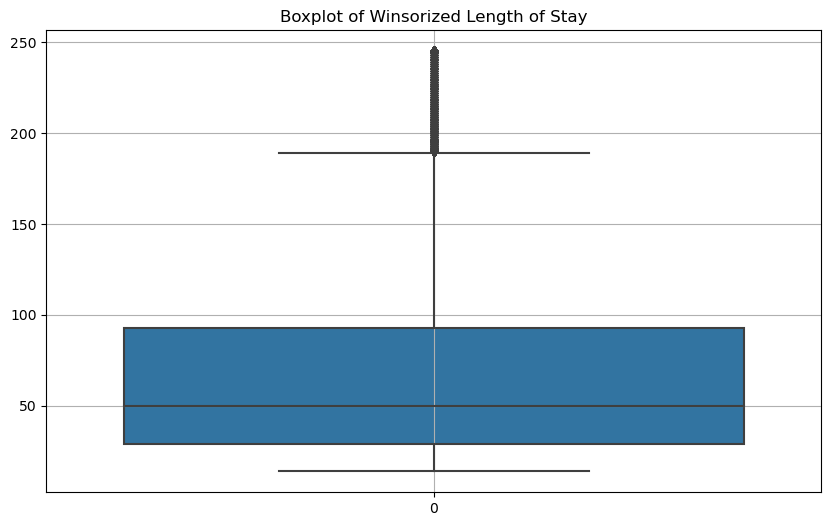

In [42]:
# Plot boxplots to identify outliers
def plot_box(data, column_name):
    plt.figure(figsize=(10,6))
    sns.boxplot(data[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.grid(True)
    plt.show()

# Plotting boxplots for the numeric columns
plot_box(data, 'Waiting Time (Minutes)')
plot_box(data, 'Length of Stay (Minutes)')
# plot_box(data,'Winsorized Length of Stay')

In [37]:
# Calculate Skewness and Kurtosis
def skewness_and_kurtosis(data, column_name):
    skewness = data[column_name].skew()
    kurtosis = data[column_name].kurtosis()
    print(f"Skewness of {column_name}: {skewness}")
    print(f"Kurtosis of {column_name}: {kurtosis}")

skewness_and_kurtosis(data, 'Waiting Time (Minutes)')
skewness_and_kurtosis(data, 'Length of Stay (Minutes)')

Skewness of Waiting Time (Minutes): 1.8071838777839058
Kurtosis of Waiting Time (Minutes): 6.902972436091255
Skewness of Length of Stay (Minutes): 2.9384489468094785
Kurtosis of Length of Stay (Minutes): 13.312464765865442


In [38]:
# Normality Test
import scipy.stats as stats

def normality_test(data, column_name):
    stat, p = stats.shapiro(data[column_name].dropna())
    print(f'Shapiro-Wilk Test for {column_name}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f"{column_name} looks like a normal distribution (fail to reject H0)")
    else:
        print(f"{column_name} does not follow a normal distribution (reject H0)")

normality_test(data, 'Waiting Time (Minutes)')
normality_test(data, 'Length of Stay (Minutes)')

Shapiro-Wilk Test for Waiting Time (Minutes): Statistics=0.8677462935447693, p=0.0
Waiting Time (Minutes) does not follow a normal distribution (reject H0)
Shapiro-Wilk Test for Length of Stay (Minutes): Statistics=0.7071875929832458, p=0.0
Length of Stay (Minutes) does not follow a normal distribution (reject H0)


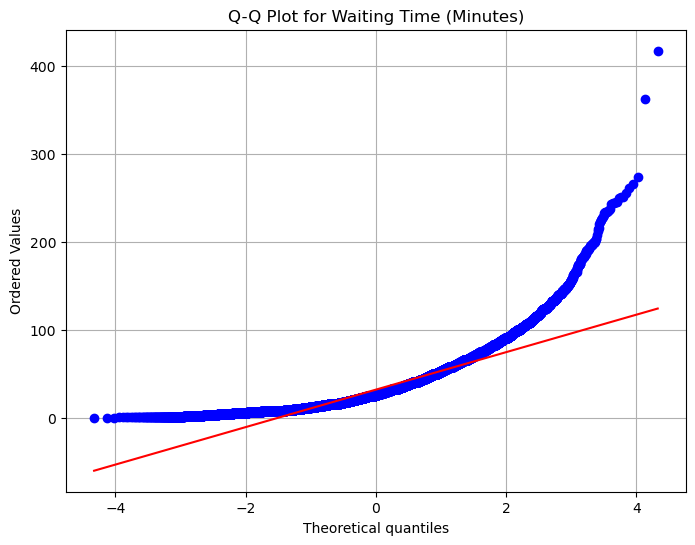

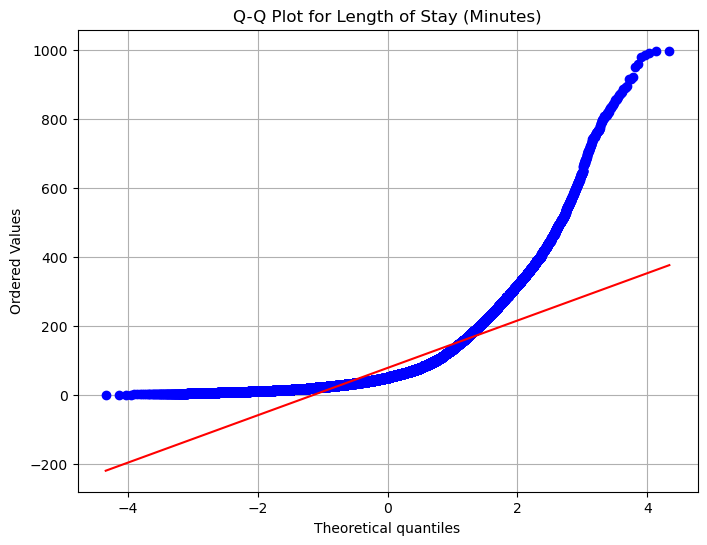

In [39]:
# QQ Plot
def qq_plot(data, column_name):
    plt.figure(figsize=(8,6))
    stats.probplot(data[column_name].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column_name}")
    plt.grid(True)
    plt.show()

qq_plot(data, 'Waiting Time (Minutes)')
qq_plot(data, 'Length of Stay (Minutes)')

In [9]:
# Print all column names in the DataFrame
print(data.columns)


Index(['ROWNUM', 'Hospital', 'Eligibility Class', 'Gender', 'Arrival Time',
       'Severity Level', 'Deparment', 'Main Diagnosis', 'Discharge Time',
       'Waiting Time (Minutes)', 'Length of Stay (Minutes)'],
      dtype='object')


In [10]:
# Data Cleaning Module for Emergency Cases Data
# Ensure that all the previous work has been completed and that the data is usable.
# Ensure correct data types
data['Arrival Time'] = pd.to_datetime(data['Arrival Time'], errors='coerce')
data['Discharge Time'] = pd.to_datetime(data['Discharge Time'], errors='coerce')

# Convert categorical fields to category data type
categorical_columns = ['Gender', 'Severity Level', 'Deparment', 'Main Diagnosis']  # Corrected 'Department' to 'Deparment'
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Confirm and handle duplicate records
print("Number of duplicate records before cleaning:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate records after cleaning:", data.duplicated().sum())

# Handling missing values in 'Waiting Time (Minutes)'
data['Waiting Time (Minutes)'] = pd.to_numeric(data['Waiting Time (Minutes)'], errors='coerce')  # Convert to numeric if not already
print("Number of missing values in 'Waiting Time (Minutes)' before:", data['Waiting Time (Minutes)'].isna().sum())
# Here you can choose to fillna with mean or median, or drop them
data['Waiting Time (Minutes)'].fillna(data['Waiting Time (Minutes)'].median(), inplace=True)
print("Number of missing values in 'Waiting Time (Minutes)' after:", data['Waiting Time (Minutes)'].isna().sum())




Number of duplicate records before cleaning: 0
Number of duplicate records after cleaning: 0
Number of missing values in 'Waiting Time (Minutes)' before: 4677
Number of missing values in 'Waiting Time (Minutes)' after: 0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97096 entries, 0 to 97095
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ROWNUM                    97096 non-null  object        
 1   Hospital                  97096 non-null  object        
 2   Eligibility Class         97055 non-null  object        
 3   Gender                    97096 non-null  category      
 4   Arrival Time              97096 non-null  datetime64[ns]
 5   Severity Level            95130 non-null  category      
 6   Deparment                 97096 non-null  category      
 7   Main Diagnosis            93826 non-null  category      
 8   Discharge Time            97087 non-null  datetime64[ns]
 9   Waiting Time (Minutes)    97096 non-null  float64       
 10  Length of Stay (Minutes)  97087 non-null  object        
dtypes: category(4), datetime64[ns](2), float64(1), object(4)
memory usage: 5.7+ MB


In [12]:
print(data.head())

  ROWNUM                                  Hospital Eligibility Class  Gender  \
0      1  Royal Commission Health Services Program  ROYAL COMMISSION  Female   
1      2  Royal Commission Health Services Program  ROYAL COMMISSION  Female   
2      3  Royal Commission Health Services Program  ROYAL COMMISSION  Female   
3      4  Royal Commission Health Services Program  ROYAL COMMISSION  Female   
4      5  Royal Commission Health Services Program  ROYAL COMMISSION  Female   

         Arrival Time Severity Level           Deparment  \
0 2023-12-13 13:17:48        Level Ⅳ  Emergency Medicine   
1 2023-12-08 10:59:28        Level Ⅲ  Emergency Medicine   
2 2023-11-05 14:03:02        Level Ⅲ  Emergency Medicine   
3 2023-10-07 22:57:41        Level Ⅲ  Emergency Medicine   
4 2023-10-21 21:32:17        Level Ⅳ  Emergency Medicine   

                                   Main Diagnosis      Discharge Time  \
0                               Pain, unspecified 2023-12-13 16:43:00   
1           

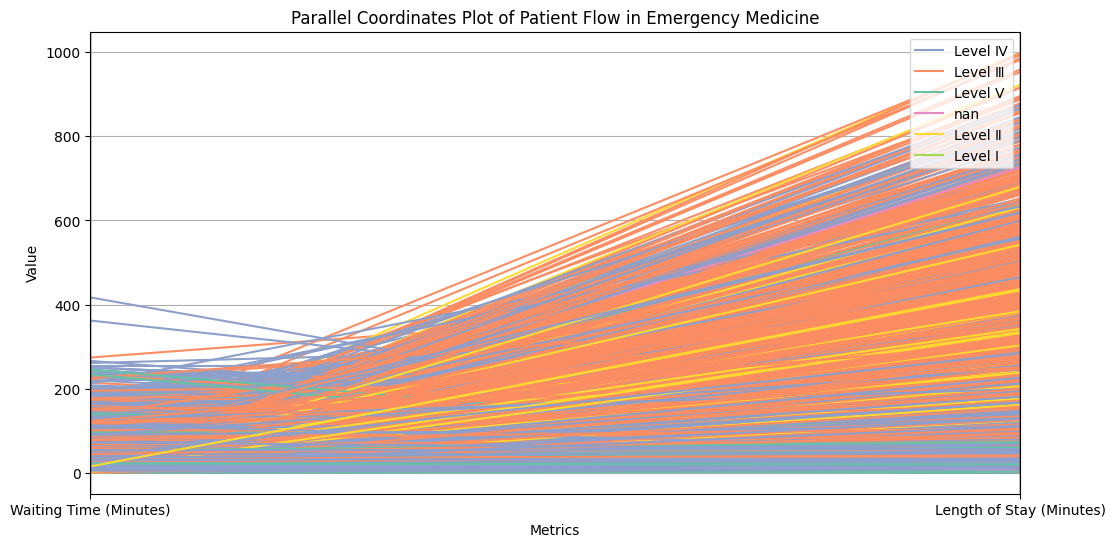

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Define a custom color palette for better distinction between categories
custom_colors = ['#8da0cb', '#fc8d62', '#66c2a5', '#e78ac3', '#ffd92f', '#a6d854']


# Convert 'Length of Stay (Minutes)' to numeric for visualization purposes
data['Length of Stay (Minutes)'] = pd.to_numeric(data['Length of Stay (Minutes)'], errors='coerce')

# Plot the parallel coordinates with the custom colors
plt.figure(figsize=(12, 6))
parallel_coordinates(data, 'Severity Level', cols=['Waiting Time (Minutes)', 'Length of Stay (Minutes)'], color=custom_colors)
plt.title('Parallel Coordinates Plot of Patient Flow in Emergency Medicine')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

# This parallel coordinates plot illustrates the relationship between waiting time and length of stay for patients with different severity levels in an emergency department. 
# Most patients have lower values for both metrics, but there are outliers with significantly longer treatment times. 
# The distribution of these metrics varies by severity level, with higher severity levels (e.g., Level IV and Level V) showing a tendency for longer treatment times. 
# The presence of `nan` values indicates some missing or unrecorded severity levels, which suggests the need for further data cleaning to improve analysis accuracy.


# K means analysis

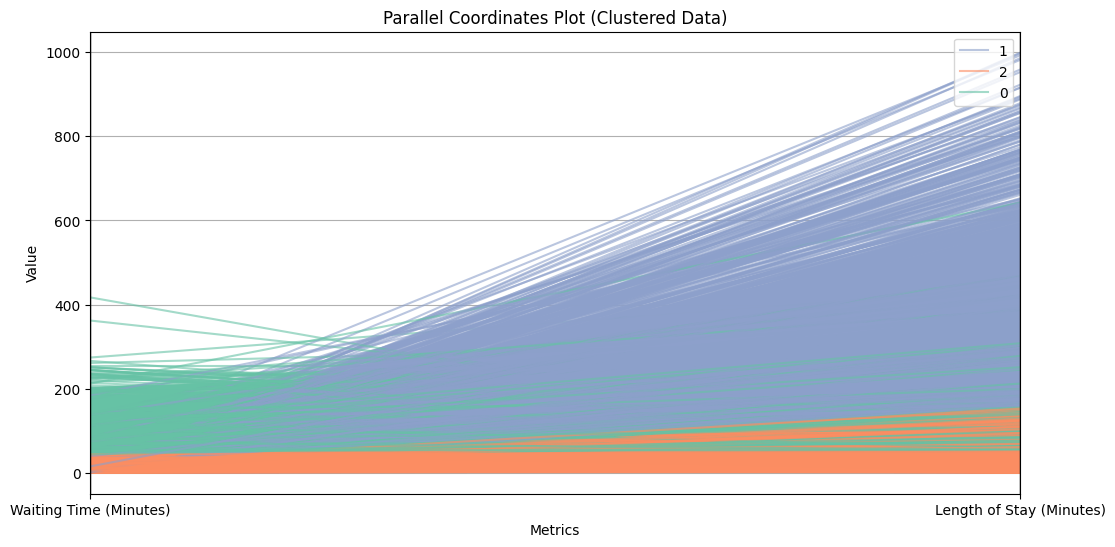

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates

# Remove NaN data for clustering
cluster_data = data[['Waiting Time (Minutes)', 'Length of Stay (Minutes)']].dropna()

# Standardize the data (Z-score normalization)
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform KMeans clustering on the standardized data
kmeans = KMeans(n_clusters=3, random_state=42).fit(cluster_data_scaled)

# Create a new column 'Cluster' in the original data, initialized with NaN
data['Cluster'] = pd.NA

# Assign cluster results to rows that were used in the clustering (non-NaN rows)
data.loc[cluster_data.index, 'Cluster'] = kmeans.labels_

# Plot a parallel coordinates plot based on cluster results (ignoring NaN labels)
# Set alpha=0.6 to reduce the overlap of lines with transparency
plt.figure(figsize=(12, 6))
parallel_coordinates(data.dropna(subset=['Cluster']), 'Cluster', cols=['Waiting Time (Minutes)', 'Length of Stay (Minutes)'], color=custom_colors, alpha=0.6)
plt.title('Parallel Coordinates Plot (Clustered Data)')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()


In [ ]:
# Cluster 0 represents patients with generally longer hospital stays, 
# Cluster 1 corresponds to patients with shorter waiting and stay times, 
# Cluster 2 lies between the two. These differences suggest potential variations in patient complexity or resource needs,
# They provides a foundation for further analysis.

# PCA

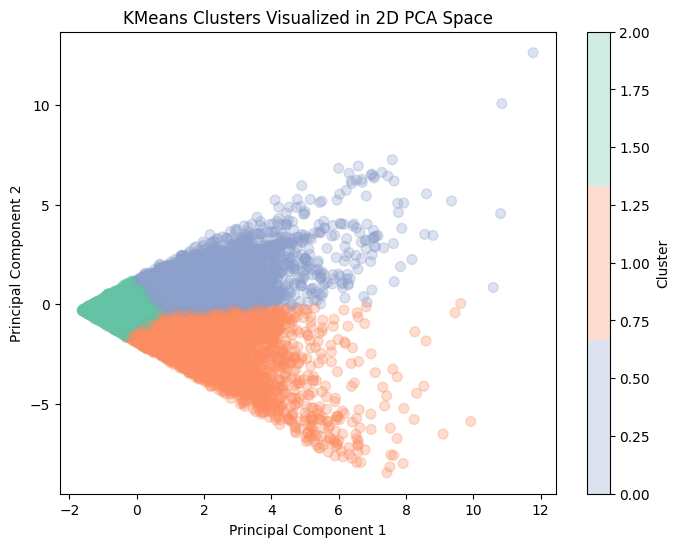

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use the first three custom colors
custom_colors = ['#8da0cb', '#fc8d62', '#66c2a5']

# Step 1: Prepare your data (remove NaN data and select features for clustering)
cluster_data = data[['Waiting Time (Minutes)', 'Length of Stay (Minutes)']].dropna()

# Step 2: Standardize the data (Z-score normalization)
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Step 3: Perform KMeans clustering on the standardized data
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Step 4: Create a new DataFrame for the non-NaN data to store the cluster labels
cluster_data_with_labels = cluster_data.copy()
cluster_data_with_labels['Cluster'] = cluster_labels

# Step 5: Apply PCA for visualization (reduce data to 2 principal components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(cluster_data_scaled)

# Step 6: Visualize the clusters in the PCA-reduced 2D space with the first three custom colors
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], 
            c=cluster_data_with_labels['Cluster'], 
            cmap=ListedColormap(custom_colors), s=50,alpha=0.3)
plt.title('KMeans Clusters Visualized in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


This 2D PCA visualization of the KMeans clustering reveals three distinct clusters, indicating successful separation of the data. Each cluster occupies different regions of the principal component space, suggesting that the underlying features capture meaningful differences between the groups. 

# Next applying ANOVA
1. Compare Group Differences：ANOVA allows us to statistically compare whether the means of variables like “Waiting Time”and “Length of Stay” differ significantly across the three KMeans clusters.
2. Validate Cluster Separation: By applying ANOVA, we can verify if the clusters represent meaningful groupings by testing if the differences between clusters are statistically significant.
3. Explore Variable Influence： ANOVA helps identify which variables contribute the most to differences between clusters, providing insights into how factors like patient complexity impact waiting time and hospital stay duration.

We will use a multi-factor ANOVA because it allows us to simultaneously analyze the effects of multiple variables, such as “Cluster”, “Severity Level”, and “Gender”, on outcomes like “Waiting Time” and “Length of Stay”. This method provides a more comprehensive understanding by not only assessing the individual impact of each factor but also exploring the potential interactions between them. By using multi-factor ANOVA, we can capture the combined effects of different patient characteristics, leading to deeper insights into the factors influencing hospital resource usage and patient outcomes.

In [43]:
print(data.columns)

Index(['ROWNUM', 'Hospital', 'Eligibility Class', 'Gender', 'Arrival Time',
       'Severity Level', 'Deparment', 'Main Diagnosis', 'Discharge Time',
       'Waiting Time (Minutes)', 'Length of Stay (Minutes)', 'Cluster'],
      dtype='object')


In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import f_oneway

# Assuming you already have the PCA-reduced data and KMeans labels
# cluster_data_with_labels already contains the 'Cluster' column from the previous steps

# Step 7: Group the data based on the KMeans results
grouped_data = {i: pca_components[cluster_data_with_labels['Cluster'] == i] for i in np.unique(cluster_data_with_labels['Cluster'])}

# Step 8: Extract the first principal component for ANOVA analysis
# We will perform an ANOVA test on the first principal component
groups = [group[:, 0] for group in grouped_data.values()]  # Extract the first principal component from each cluster

# Step 9: Perform ANOVA using the f_oneway function
anova_result = f_oneway(*groups)

# Print the ANOVA results
print("ANOVA Results:")
print("F-Value: {:.2f}".format(anova_result.statistic))
print("P-Value: {:.4f}".format(anova_result.pvalue))


ANOVA Results:
F-Value: 76394.29
P-Value: 0.0000


The ANOVA results show an extremely high F-value (76394.29) and a very low P-value (close to 0), strongly indicating significant statistical differences between the clusters in the cluster analysis. These statistical results confirm that the KMeans clustering algorithm effectively differentiated data groups with distinct characteristics, validating the reliability of the clustering results and the effectiveness of the data analysis.

Cluster and Severity Level are the main factors influencing waiting time, while Gender itself does not have a significant impact. However, its interaction with Cluster is worth further attention.

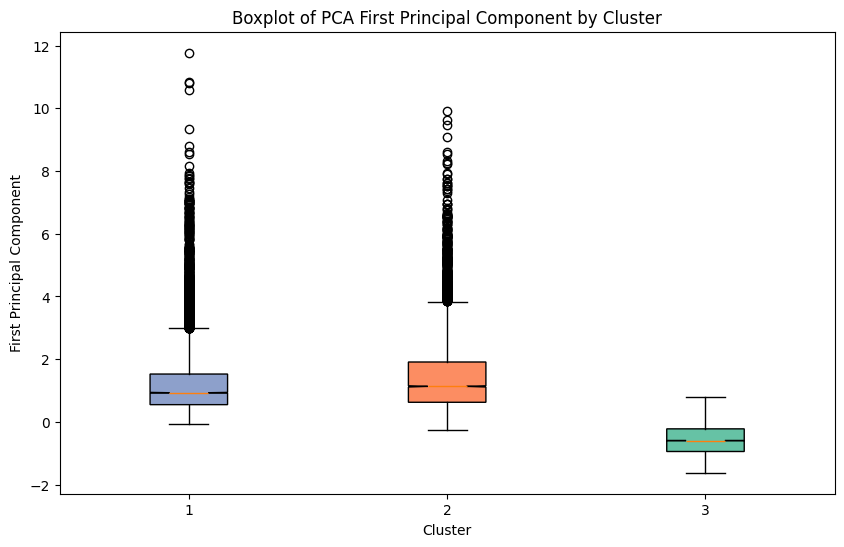

In [53]:
# It is more clear now
# Assuming we have the grouped PCA component data from the previous ANOVA steps
groups = [group[:, 0] for group in grouped_data.values()]  # Extract the first principal component from each cluster

# Create the boxplot
plt.figure(figsize=(10, 6))
box = plt.boxplot(groups, patch_artist=True, notch=True)

# Apply custom colors to each box
for patch, color in zip(box['boxes'], custom_colors):
    patch.set_facecolor(color)

# Setting the chart title and axis labels
plt.title('Boxplot of PCA First Principal Component by Cluster')
plt.xlabel('Cluster')
plt.ylabel('First Principal Component')

# Display the plot
plt.show()


# correlation_matrix

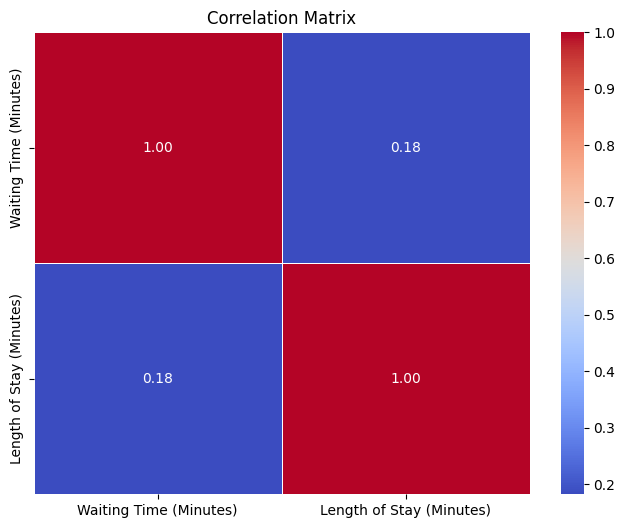

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select only numeric columns for the correlation calculation
numeric_data = data.select_dtypes(include=[np.number])  # This selects only the numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


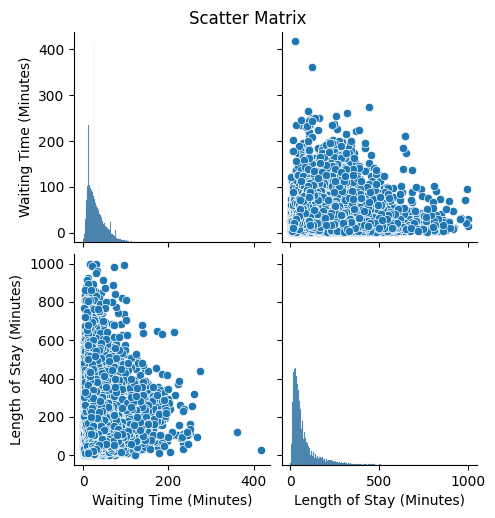

In [56]:

sns.pairplot(data)
plt.suptitle('Scatter Matrix', y=1.02)  
plt.show()


The relationship between waiting time and length of stay exhibits a certain degree of positive correlation, though the strength of this relationship is weak. Additionally, the data contains some outliers and displays non-uniform distribution, which may impact further analysis and decision-making. 

It may be necessary to perform appropriate data transformations or address outliers before proceeding with predictive modeling.